In [81]:
import pandas as pd
heart = pd.read_csv('heart_disease_uci.csv')
# heart = heart.dropna()
# heart.info()
# Check how many missing values exist in each column
print(heart.isnull().sum())


age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# drop missing values in features
heart_clean = heart.dropna(subset=['chol'])

X = heart_clean[['age', 'trestbps','thalch', 'oldpeak', 'ca']]
y = heart_clean['chol']

# replace missing value in tarhet and fit into X_train and X_test
imp = SimpleImputer(strategy='mean')
X_imputed = imp.fit_transform(X)


# scale the features as we are using ElasticNet
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

#ElasticNet model
chol_reg = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)

# Train the model
chol_reg.fit(X_train, y_train)

# predictions on the test set
y_pred = chol_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 11500.929639448974
R^2 Score: 0.02682920332695149


In [ ]:
#2.Classification Models
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, average_precision_score
from sklearn.metrics import roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
# fill missing values
for col in heart.columns:#check if there is missing value in each column
    if heart[col].isnull().sum() > 0 and heart[col].dtype in ['int64', 'float64']: #select columns that has integer or float data
        heart[col] = heart[col].fillna(heart[col].mean())
print(heart.isnull().sum())


In [84]:
#split training data

heart["num"] = (heart["num"] > 0).astype(int)
X = heart[["age", "trestbps", "chol", "thalch","oldpeak", 'ca',]]
y = heart["num"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [64]:
heart_log = LogisticRegression(penalty = 'elasticnet', solver = "saga", l1_ratio = 0.5)
heart_log.fit(X_train, y_train)
y_pred = heart_log.predict(X_test)
y_prob = heart_log.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_prob)
prc = average_precision_score(y_test, y_prob)

print("accuracy: ", acc)
print("f1: ",f1)
print("ROC: ", roc)
print("PRC: ",prc)

accuracy:  0.75
f1:  0.7766990291262136
ROC:  0.8174923547400612
PRC:  0.8598047034836024


In [65]:
heart_log = LogisticRegression(penalty = 'l1', solver = 'saga')
heart_log.fit(X_train, y_train)
y_pred = heart_log.predict(X_test)
y_prob = heart_log.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_prob)
prc = average_precision_score(y_test, y_prob)

print("accuracy: ", acc)
print("f1: ",f1)
print("ROC: ", roc)
print("PRC: ",prc)

accuracy:  0.75
f1:  0.7766990291262136
ROC:  0.8168807339449541
PRC:  0.8593180470323096


In [66]:
heart_log = LogisticRegression(penalty = 'l2', solver = 'saga')
heart_log.fit(X_train, y_train)
y_pred = heart_log.predict(X_test)
y_prob = heart_log.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_prob)
prc = average_precision_score(y_test, y_prob)

print("accuracy: ", acc)
print("f1: ",f1)
print("ROC: ", roc)
print("PRC: ",prc)

accuracy:  0.75
f1:  0.7766990291262136
ROC:  0.817737003058104
PRC:  0.8603627838421809


In [67]:
heart_log = LogisticRegression(penalty = 'l1', solver = 'liblinear')
heart_log.fit(X_train, y_train)
y_pred = heart_log.predict(X_test)
y_prob = heart_log.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_prob)
prc = average_precision_score(y_test, y_prob)

print("accuracy: ", acc)
print("f1: ",f1)
print("ROC: ", roc)
print("PRC: ",prc)

accuracy:  0.75
f1:  0.7766990291262136
ROC:  0.8168807339449541
PRC:  0.8593180470323096


In [85]:
heart_log = LogisticRegression(penalty = 'l2', solver = 'liblinear')
heart_log.fit(X_train, y_train)
y_pred = heart_log.predict(X_test)
y_prob = heart_log.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_prob)
prc = average_precision_score(y_test, y_prob)

print("accuracy: ", acc)
print("f1: ",f1)
print("ROC: ", roc)
print("PRC: ",prc)


accuracy:  0.75
f1:  0.7766990291262136
ROC:  0.817737003058104
PRC:  0.8603627838421809


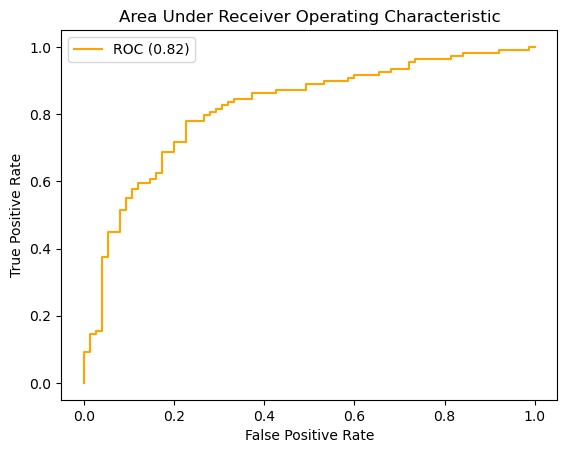

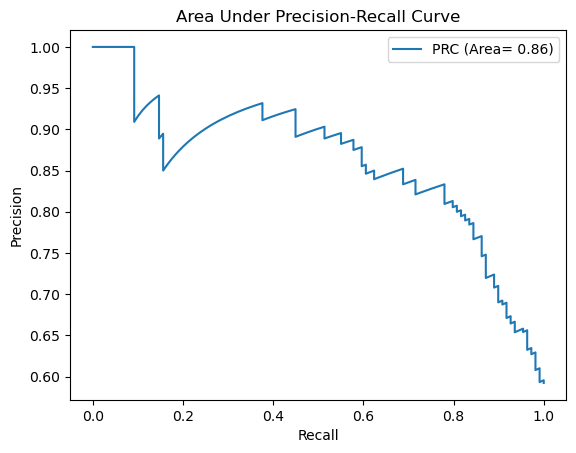

In [ ]:

#plot auroc graph
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, color='orange',label=f'ROC ({roc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Receiver Operating Characteristic')
plt.legend()
plt.show()

# plot auprc graph
precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.figure()
plt.plot(recall, precision, label=f'PRC (Area= {prc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Area Under Precision-Recall Curve')
plt.legend()
plt.show()

In [73]:
from sklearn.neighbors import KNeighborsClassifier
heart_knn = KNeighborsClassifier(n_neighbors=1)
heart_knn.fit(X_train, y_train)
y_pred = heart_knn.predict(X_test)
y_prob = heart_knn.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_prob)
prc = average_precision_score(y_test, y_prob)

print("accuracy: ", acc)
print("f1: ",f1)
print("ROC: ", roc)
print("PRC: ",prc)



accuracy:  0.7391304347826086
f1:  0.7623762376237624
ROC:  0.7465443425076452
PRC:  0.7588000909281968


In [79]:
heart_knn = KNeighborsClassifier(n_neighbors=5)
heart_knn.fit(X_train, y_train)

y_pred = heart_knn.predict(X_test)
y_prob = heart_knn.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_prob)
prc = average_precision_score(y_test, y_prob)

print("accuracy: ", acc)
print("f1: ",f1)
print("ROC: ", roc)
print("PRC: ",prc)



accuracy:  0.782608695652174
f1:  0.8076923076923077
ROC:  0.8141284403669724
PRC:  0.8339860211439145


In [78]:
heart_knn = KNeighborsClassifier(n_neighbors=10)
heart_knn.fit(X_train, y_train)
y_pred = heart_knn.predict(X_test)
y_prob = heart_knn.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_prob)
prc = average_precision_score(y_test, y_prob)

print("accuracy: ", acc)
print("f1: ",f1)
print("ROC: ", roc)
print("PRC: ",prc)

accuracy:  0.7880434782608695
f1:  0.8115942028985508
ROC:  0.8087461773700306
PRC:  0.8384448824914279


In [77]:
heart_knn = KNeighborsClassifier(n_neighbors=20)
heart_knn.fit(X_train, y_train)
y_pred = heart_knn.predict(X_test)
y_prob = heart_knn.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_prob)
prc = average_precision_score(y_test, y_prob)

print("accuracy: ", acc)
print("f1: ",f1)
print("ROC: ", roc)
print("PRC: ",prc)

accuracy:  0.8097826086956522
f1:  0.8325358851674641
ROC:  0.8496636085626911
PRC:  0.8616110704125548
